In [1]:
%cd ..

/sc/arion/projects/pandeg01a/susmaa01/nona


In [2]:
from importlib import reload

import similarity_masks
import data.dataset_classes
import utils
import models

import ft_cnn

/sc/arion/projects/pandeg01a/susmaa01/nona/.venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
reload(similarity_masks)
reload(utils)
reload(data.dataset_classes)
reload(models)
reload(ft_cnn)

%run ft_cnn.py

In [72]:
top_d = 2048
errors = []
for d in tqdm(range(top_d)):
    x = 2 * torch.rand(4000,d) - 1
    sim = torch.cdist(x,x, p=2)
    e = sum(sim.diag()!=0) / len(sim.diag())
    errors.append(e)

100%|██████████| 2048/2048 [08:10<00:00,  4.17it/s]


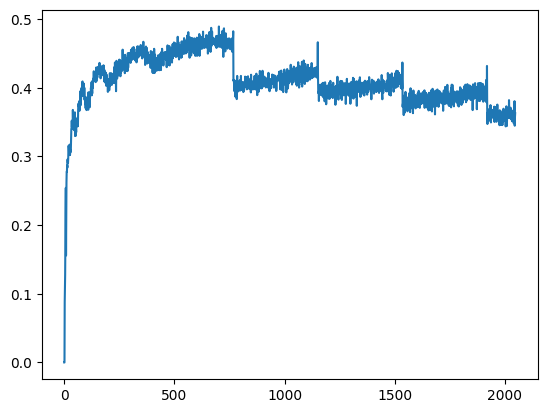

In [78]:
import matplotlib.pyplot as plt

plt.plot(list(range(top_d)), errors)
# for i in range(11):
#     plt.plot([2**i*1.5 for count in range(1000)], [count/2000 for count in range(1000)])
plt.show()

In [60]:
from torch.nn.functional import normalize
x = 2 * torch.rand(50,50) - 1
x_norm = normalize(x, p=2, dim=1)
# x_n_norm = normalize(x_n, p=2, dim=1)
sim = x_norm @ torch.t(x_norm)
sim.min()

tensor(-0.4087)

In [76]:
from similarity_masks import norm_sim
a = torch.tensor([0.6])
x = torch.rand(5,3)
x_n = torch.rand(5,3)
sim = -torch.cdist(x,x)
sim_norm = norm_sim(sim)
print(sim)
print(sim_norm)
# print(sim_norm.diag().diag())
# top_sims = (sim_norm - sim_norm.diag().diag()).max(dim=1)[0]

# print(top_sims)
# a = torch.min(a, top_sims.min())
# a

tensor([[-0.0000, -0.9141, -0.4713, -0.4969, -0.3870],
        [-0.9141, -0.0000, -0.7898, -0.4934, -0.7529],
        [-0.4713, -0.7898, -0.0000, -0.4583, -0.6912],
        [-0.4969, -0.4934, -0.4583, -0.0000, -0.3895],
        [-0.3870, -0.7529, -0.6912, -0.3895, -0.0000]])
tensor([[1.0000, 0.0000, 0.4845, 0.4564, 0.5767],
        [0.0000, 1.0000, 0.1360, 0.4602, 0.1764],
        [0.4033, 0.0000, 1.0000, 0.4197, 0.1249],
        [0.0000, 0.0070, 0.0776, 1.0000, 0.2160],
        [0.4860, 0.0000, 0.0819, 0.4826, 1.0000]])
